Introducción
------------------

Se plantea resolver la evolución temporal de la temperatura de un tubo metálico que pasa a velocidad constante por un horno de largo `L`, con la primera mitad del horno a temperatura `T1` y la segunda mitad a temperatura `T2`.

Por la ley de conservación de la energía obtenemos la siguiente ecuación diferencial:

$-mC \frac{dT}{dt} = h_c S (T-T_\infty ) + \sigma \epsilon S (T^4 - T_\infty ^4)$

Para resolverla vamos a utilizar los métodos de Euler y Runge-Kutta de orden 4, por lo que reescribimos la ecuación de la siguiente forma:

$\frac{dT}{dt} = f(t,T) = -[\frac{h_c}{mC} S (T-T_\infty ) + \frac{\sigma \epsilon S}{mC} (T^4 - T_\infty ^4)]$

Importamos las librerías que vamos a utilizar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Método de Euler
---------------


A continuación se muestra la implementación del método de Euler que vamos a utilizar en este trabajo.

In [2]:
def euler (f,h,y0,t0,tf):
    y_array = [y0]
    t_array = [t0]
    t = t0
    y = y0
    while (t <= tf):
        y = y + h*f(t,y)
        t = t+h
        y_array.append(y)
        t_array.append(t)
    return [y_array,t_array]       

Mostramos un ejemplo de la utilización del método

In [3]:
def g (t,y):
    return t*np.cos(y+t**3)+np.log(y*t+2)

In [4]:
a = euler(g,0.001,0,0,3)

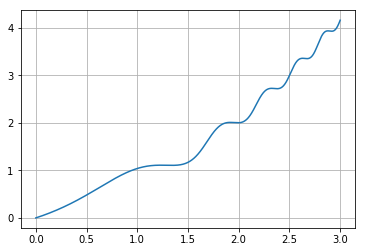

In [5]:
plt.plot(a[1],a[0])
plt.grid(True)

Método de Runge-Kutta de orden 4
--------------------------------


In [6]:
def rk4 (f,h,y0,t0,tf):
    y_array = [y0]
    t_array = [t0]
    y = y0
    t = t0
    while t <= tf :
        k1 = f(t,y)
        k2 = f(t+(h/2),y+((h/2)*k1))
        k3 = f(t+(h/2),y+((h/2)*k2))
        k4 = f(t+h,y+(h*k3))
        y = y+((h/6)*(k1+(2*k2)+(2*k3)+k4))
        t += h
        y_array.append(y)
        t_array.append(t)
    return [y_array,t_array]

In [7]:
b = rk4(g,0.01,0,0,3)

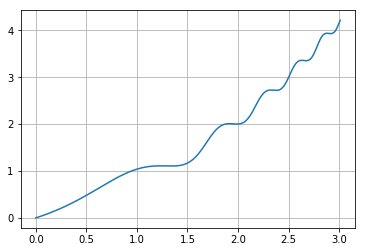

In [8]:
plt.plot(b[1],b[0])
plt.grid(True)

Punto 1
-------



### Datos del problema

Definimos f(t,T) sin el término de intercambio radiactivo y la temperatura T_inf (temperatura del horno) la cual no es constante

In [20]:
def f (t,T):
    return ((((-hc)*s) / (m*C)) * (T-T_inf(t,T1,T2)))

def T_inf (t,T1,T2):
    x = v0*t
    if x<=(L/2):
        return T1
    else:
        return T2

Constantes:

In [17]:
p = 7850
C = 480
OD = 0.24448  
WT = 0.01384
Lt = 12
L = 50
nbol = 50
cad = 24
T1 = 986
T2 = T1
hc = 20
o = 0.000000056703
e = 0.85

v0 = L/(nbol*cad)
tf = L/v0
m = p*np.pi*OD*WT*(1-(WT/OD))*Lt
s = np.pi*OD*Lt

Obtenemos el resultado de los métodos y la solución analítica

In [21]:
rk4_1 = rk4(f,cad,293.15,0,tf)

In [22]:
euler_1 = euler(f,cad,293.15,0,tf)

In [23]:
def solution_1(t):
    return T_inf(t,T1,T2)+((293.15-T_inf(t,T1,T2))*(np.e**((((-(hc*s))/(m*C)))*t)))
real_sol_1 = [[],[]]
real_sol_1[1] = euler_1[1]
for i in real_sol_1[1]:
    real_sol_1[0].append(solution_1(i))

### Ítem 1a


Pasamos los resultados a grados celsius y el tiempo a minutos para realizar el gráfico comparando ambos métodos con la solución analítica

In [24]:
rk4_1_celsius = np.array(rk4_1[0])-273.15
euler_1_celsius = np.array(euler_1[0])-273.15
real_sol_1_celsius = np.array(real_sol_1[0])-273.15
x_min = np.array(rk4_1[1])/60 #todos los x son iguales

Text(0.5,1,'Comparación entre las soluciones de ambos metodos y la solución analítica')

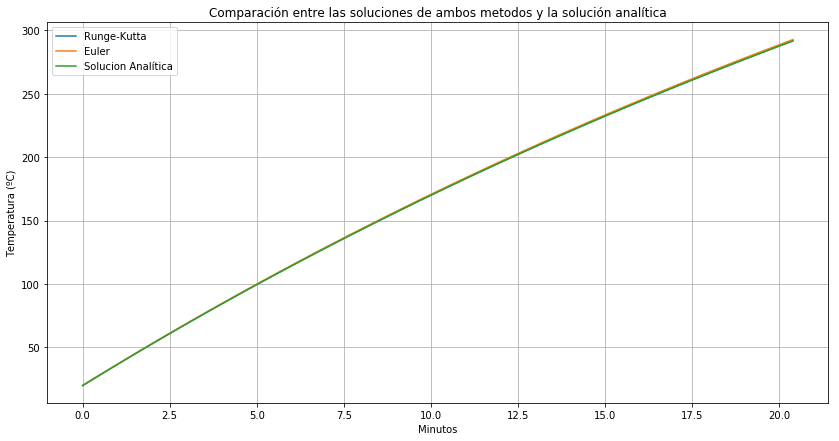

In [232]:
fig,ax = plt.subplots(figsize=(14,7))
sns.lineplot(x=x_min,y=rk4_1_celsius,label='Runge-Kutta')
sns.lineplot(x=x_min,y=euler_1_celsius,label='Euler')
sns.lineplot(x=x_min,y=real_sol_1_celsius,label='Solucion Analítica')
plt.grid(True)
plt.ylabel('Temperatura (ºC)')
plt.xlabel('Minutos')
plt.title('Comparación entre las soluciones de ambos metodos y la solución analítica')

### Ítem 1b

Obtenemos el error relativo, en el caso de Runge-Kutta como es cero, el error relativo es igual al absoluto,y realizamos el gráfico

Text(0.5,1,'Error relativo en función de los minutos')

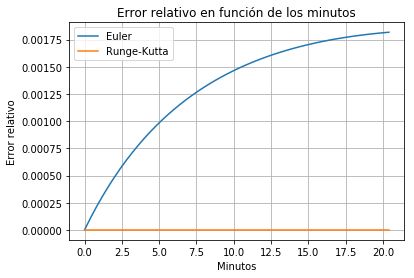

In [231]:
diff_rk4_1 = np.array(rk4_1[0])-np.array(real_sol_1[0])
diff_euler_1 = (np.array(euler_1[0])-np.array(real_sol_1[0]))/np.array(euler_1[0])
sns.lineplot(x=x_min,y=diff_euler_1,label='Euler')
sns.lineplot(x=x_min,y=diff_rk4_1,label='Runge-Kutta')
plt.grid(True)
plt.xlabel('Minutos')
plt.ylabel('Error relativo')
plt.title('Error relativo en función de los minutos')

### Ítem 1c

La conclusión es que el método de Runge-Kutta de orden 4 es mucho mejor que el de Euler ya que tiene un orden de convergencia mayor y permite obtener resultados exactos en ciertos casos.

Punto 2
-------



### Datos del problema

Definimos la nueva función f(t,T) con el término de intercambio radiactivo

In [11]:
def f (t,T):
    return ((((-hc)*s) / (m*C)) * (T-T_inf(t,T1,T2))) - (((o*e*s)*((T**4) - (T_inf(t,T1,T2)**4)))/(m*C))

Constantes:

In [9]:
p = 7850
C = 480
OD = 0.24448  
WT = 0.01384
Lt = 12
L = 50
nbol = 50
cad = 24
T1 = 986
T2 = T1
hc = 20
o = 5.6703*(10**(-8))
e = 0.85

v0 = L/(nbol*cad)
tf = L/v0
m = p*np.pi*OD*WT*(1-(WT/OD))*Lt
s = np.pi*OD*Lt

### Ítem 2a
Elegimos el método de Runge-Kutta porque es el método que funcionó mejor para el ítem 1 (dió cero error)

In [12]:
rk4_2 = rk4(f,cad,293.15,0,tf)

In [13]:
def solution_2(t):
    return T_inf(t,T1,T2)+((293.15-T_inf(t,T1,T2))*(np.e**((((-(hc*s))/(m*C)))*t)))
real_sol_2 = [[],[]]
real_sol_2[1] = rk4_2[1]
for i in real_sol_2[1]:
    real_sol_2[0].append(solution_2(i))

### Ítem 2b

In [29]:
rk4_2_celsius = np.array(rk4_2[0])-273.15
real_sol_2_celsius = np.array(real_sol_2[0])-273.15
x_min_2 = np.array(rk4_2[1])/60

Text(0.5,1,'Comparación entre la solución con intercambio radiactivo y la solución analítica sin intercambio radiactivo')

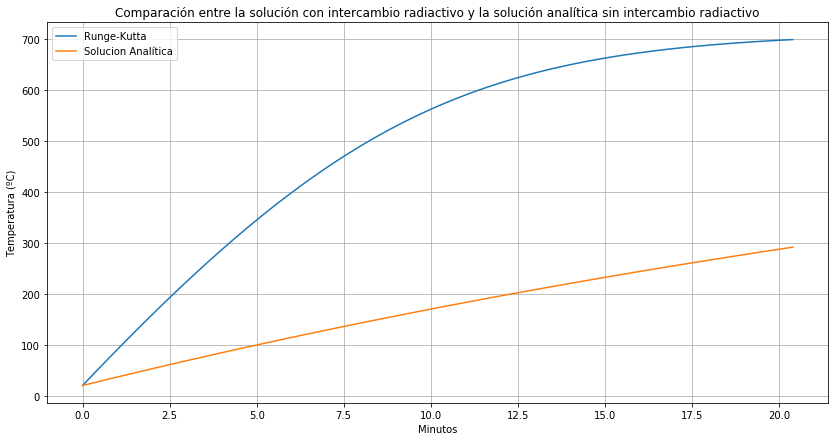

In [234]:
fig,ax = plt.subplots(figsize=(14,7))
sns.lineplot(x=x_min_2,y=rk4_2_celsius,label='Runge-Kutta')
sns.lineplot(x=x_min_2,y=real_sol_2_celsius,label='Solucion Analítica')
plt.grid(True)
plt.ylabel('Temperatura (ºC)')
plt.xlabel('Minutos')
plt.title('Comparación entre la solución con intercambio radiactivo y la solución analítica sin intercambio radiactivo')

Vemos que el intercambio de radiación **NO** es despreciable

### Ítem 2c

Obtenemos el soaking y la temperatura promedio durante el mismo

In [235]:
for i,v in enumerate(rk4_2_celsius):
    if v >= (rk4_2_celsius[len(rk4_2_celsius)-1] - 10):
        index = i
        break

sk =  x_min_2[len(x_min_2)-1] - x_min_2[index]
tsk = np.mean(rk4_2_celsius[index:])
print('Soaking: '+str(sk)+' minutos')
print('Temperatura promedio durante el soaking: '+str(tsk)+' ºC')

Soaking: 2.0 minutos
Temperatura promedio durante el soaking: 695.1501077479244 ºC


Punto 3
-----------

### Parámetros fijos

In [217]:
p = 7850
C = 480
OD = 0.24448  
WT = 0.01384
Lt = 12
L = 50
nbol = 50
cad = 24
hc = 20
o = 5.6703*(10**(-8))
e = 0.85

v0 = L/(nbol*cad)
tf = L/v0

In [218]:
m = p*np.pi*OD*WT*(1-(WT/OD))*Lt
s = np.pi*OD*Lt

### Modelo Numérico

Definimos la función `soaking` que recibe las temperaturas T1 y T2 en Kelvin e imprime el soaking (en minutos) y la temperatura promedio (en ºC)

In [219]:
def soaking (T_inf_1,T_inf_2):
    def f (t,T):
        return ((((-hc)*s) / (m*C)) * (T-T_inf(t,T1,T2))) - (((o*e*s)*((T**4) - (T_inf(t,T1,T2)**4)))/(m*C))

    def T_inf (t,T1,T2):
        x = v0*t
        if x<=(L/2):
            return T1
        else:
            return T2
        
        
    T1 = T_inf_1
    T2 = T_inf_2
    rk4_3 = rk4(f,cad,293.15,0,tf)
    rk4_3_celsius = np.array(rk4_3[0])-273.15
    x_min_3 = np.array(rk4_3[1])/60 #todos los x son iguales
    
    for i,v in enumerate(rk4_3_celsius):
        if v >= (rk4_3_celsius[len(rk4_3_celsius)-1] - 10):
            index = i
            break

    sk =  x_min_3[len(x_min_3)-1] - x_min_3[index]
    tsk = np.mean(rk4_3_celsius[index:])
    
    sns.lineplot(x=x_min_3,y=rk4_3_celsius)
    plt.grid(True)
    print("Soaking: "+str(sk)+" minutos")
    print("Temperatura promedio de soaking: "+str(tsk)+ " ºC")

### Resultados

Los resultados fueron encontrados a mano ejecutando varias veces esta función con distintos valores

Soaking: 10.399999999999999 minutos
Temperatura promedio de soaking: 695.5523115470097 ºC


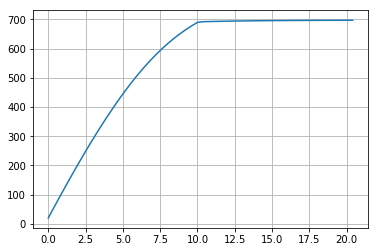

In [220]:
soaking(1070,971)

Punto 4
-----------

### Parámetros  fijos

In [207]:
p = 7850
C = 480
OD = 0.24448  
WT = 0.01384
Lt = 12
L = 50
nbol = 50
hc = 20
o = 5.6703*(10**(-8))
e = 0.85

In [208]:
m = p*np.pi*OD*WT*(1-(WT/OD))*Lt
s = np.pi*OD*Lt

### Modelo Numérico

Definimos la nueva función `soaking` que también depende de la cadencia

In [209]:
def soaking (T_inf_1,T_inf_2,cadencia):
    def f (t,T):
        return ((((-hc)*s) / (m*C)) * (T-T_inf(t,T1,T2))) - (((o*e*s)*((T**4) - (T_inf(t,T1,T2)**4)))/(m*C))

    def T_inf (t,T1,T2):
        x = v0*t
        if x<=(L/2):
            return T1
        else:
            return T2
        
    cad = cadencia

    v0 = L/(nbol*cad)
    tf = L/v0
    print('Tiempo final: '+str(tf/60)+' minutos')
    T1 = T_inf_1
    T2 = T_inf_2
    rk4_4 = rk4(f,cad,293.15,0,tf)
    rk4_4_celsius = np.array(rk4_4[0])-273.15
    x_min_4 = np.array(rk4_4[1])/60 #todos los x son iguales
    
    for i,v in enumerate(rk4_4_celsius):
        if v >= (rk4_4_celsius[len(rk4_4_celsius)-1] - 10):
            index = i
            break

    sk =  x_min_4[len(x_min_4)-1] - x_min_4[index]
    tsk = np.mean(rk4_4_celsius[index:])
    
    sns.lineplot(x=x_min_4,y=rk4_4_celsius)
    plt.grid(True)
    print("Soaking: "+str(sk)+" minutos")
    print("Temperatura promedio de soaking: "+str(tsk)+ " ºC")

Tiempo final: 19.166666666666668 minutos
Soaking: 9.966666666666667 minutos
Temperatura promedio de soaking: 695.3636818565292 ºC


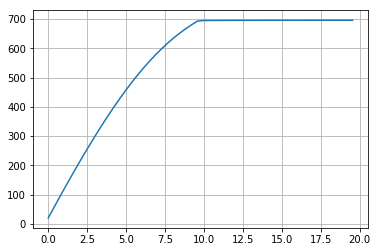

In [215]:
soaking(1080,969,23)

Punto 5
-----------

### Parámetros fijos

In [221]:
p = 7850
C = 480
OD = 0.24448  
WT = 0.01384
Lt = 12
L = 50
nbol = 50
cad = 24
hc = 20
o = 5.6703*(10**(-8))
e = 0.85

v0 = L/(nbol*cad)
tf = L/v0

In [222]:
m = p*np.pi*OD*WT*(1-(WT/OD))*Lt
s = np.pi*OD*Lt

### Modelo Numérico

En este caso para realizar el método iterativo para encontrar las soluciones al sistema de ecuaciones definimos `soaking` de forma diferente para que reciba las temperaturas T1 y T2 en celsius.

In [223]:
# recibe T1 y T2 en celsius
def soaking (T_inf_1,T_inf_2):
    def f (t,T):
        return ((((-hc)*s) / (m*C)) * (T-T_inf(t,T1,T2))) - (((o*e*s)*((T**4) - (T_inf(t,T1,T2)**4)))/(m*C))

    def T_inf (t,T1,T2):
        x = v0*t
        if x<=(L/2):
            return T1
        else:
            return T2
        
    # pasar a kelvin    
    T1 = T_inf_1+273.15
    T2 = T_inf_2+273.15
    
    # resolver por runge-kutta 4 usando temperatura en kelvin
    rk4_5 = rk4(f,cad,293.15,0,tf)
    
    # pasar a celsius de nuevo y a minutos
    rk4_5_celsius = np.array(rk4_5[0])-273.15
    x_min_5 = np.array(rk4_5[1])/60 #todos los x son iguales
    
    for i,v in enumerate(rk4_5_celsius):
        if v >= (rk4_5_celsius[len(rk4_5_celsius)-1] - 10):
            index = i
            break

    sk =  x_min_5[len(x_min_5)-1] - x_min_5[index]
    tsk = np.mean(rk4_5_celsius[index:])
    
    # devuelve en celsius o minutos
    return np.array([tsk,sk])    

### Sistema de ecuaciones

Definimos el método iterativo que resuelve el sistema de ecuaciones, recibe una semilla, el objetivo (sk,tsk), el jacobiano `J` y la tolerancia para el criterio de paro.

In [224]:
def metodo (seed,obj,j,tol):
    p = seed
    dif = 100
    iter = 0
    while dif >= tol:
        p_new = p - j.dot(soaking(p[0],p[1])-obj)
        dif = np.absolute(p_new-p).max()
        p = p_new
        iter += 1
    print("T1: "+str(p[0])+" ºC")
    print("T2: "+str(p[1])+" ºC")
    print("Nº iteraciones: "+str(iter))

Utilizamos el Jacobiano que sugiere el enunciado y la tolerancia de 3 dígitos.

In [225]:
J = np.array([[0.25,0.75],[0.75,0.25]])
tol = 0.001

#### Caso A

In [226]:
seed = np.array([712,712])
obj = np.array([695.15,10])
metodo(seed,obj,J,tol)

T1: 793.9267696312763 ºC
T2: 699.380308893829 ºC
Nº iteraciones: 32


#### Caso B

In [227]:
seed = np.array([712,712])
obj = np.array([656.8,10])
metodo(seed,obj,J,tol)

T1: 769.0120237191966 ºC
T2: 661.4360711575893 ºC
Nº iteraciones: 29


#### Caso C

In [228]:
seed = np.array([712,712])
obj = np.array([706.8,10])
metodo(seed,obj,J,tol)

T1: 801.7177182535504 ºC
T2: 710.7531547606515 ºC
Nº iteraciones: 35


Conclusiones
--------------------